In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get the Data

#### Load the Data

In [2]:
DATASET_NAME = "diamonds"
DATASET_DIR = "data"
UNPACKED_DIR = os.path.join("data", "unpacked")

In [3]:
os.makedirs(UNPACKED_DIR, exist_ok=True)
tgz_path = os.path.join(DATASET_DIR, DATASET_NAME + ".tgz")
dataset_tgz = tarfile.open(tgz_path)
dataset_tgz.extractall(path=UNPACKED_DIR)
dataset_tgz.close()

In [4]:
csv_path = os.path.join(UNPACKED_DIR, DATASET_NAME + ".csv")
diamonds = pd.read_csv(csv_path)

#### Take a Quick Look at the Data Structure

In [5]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diamonds["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [8]:
diamonds["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [9]:
diamonds["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [10]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
diamonds[["x", "y", "z"]][diamonds[["x", "y", "z"]] == 0].count()

x     8
y     7
z    20
dtype: int64

In [12]:
diamonds.drop("Unnamed: 0", axis=1, inplace=True)

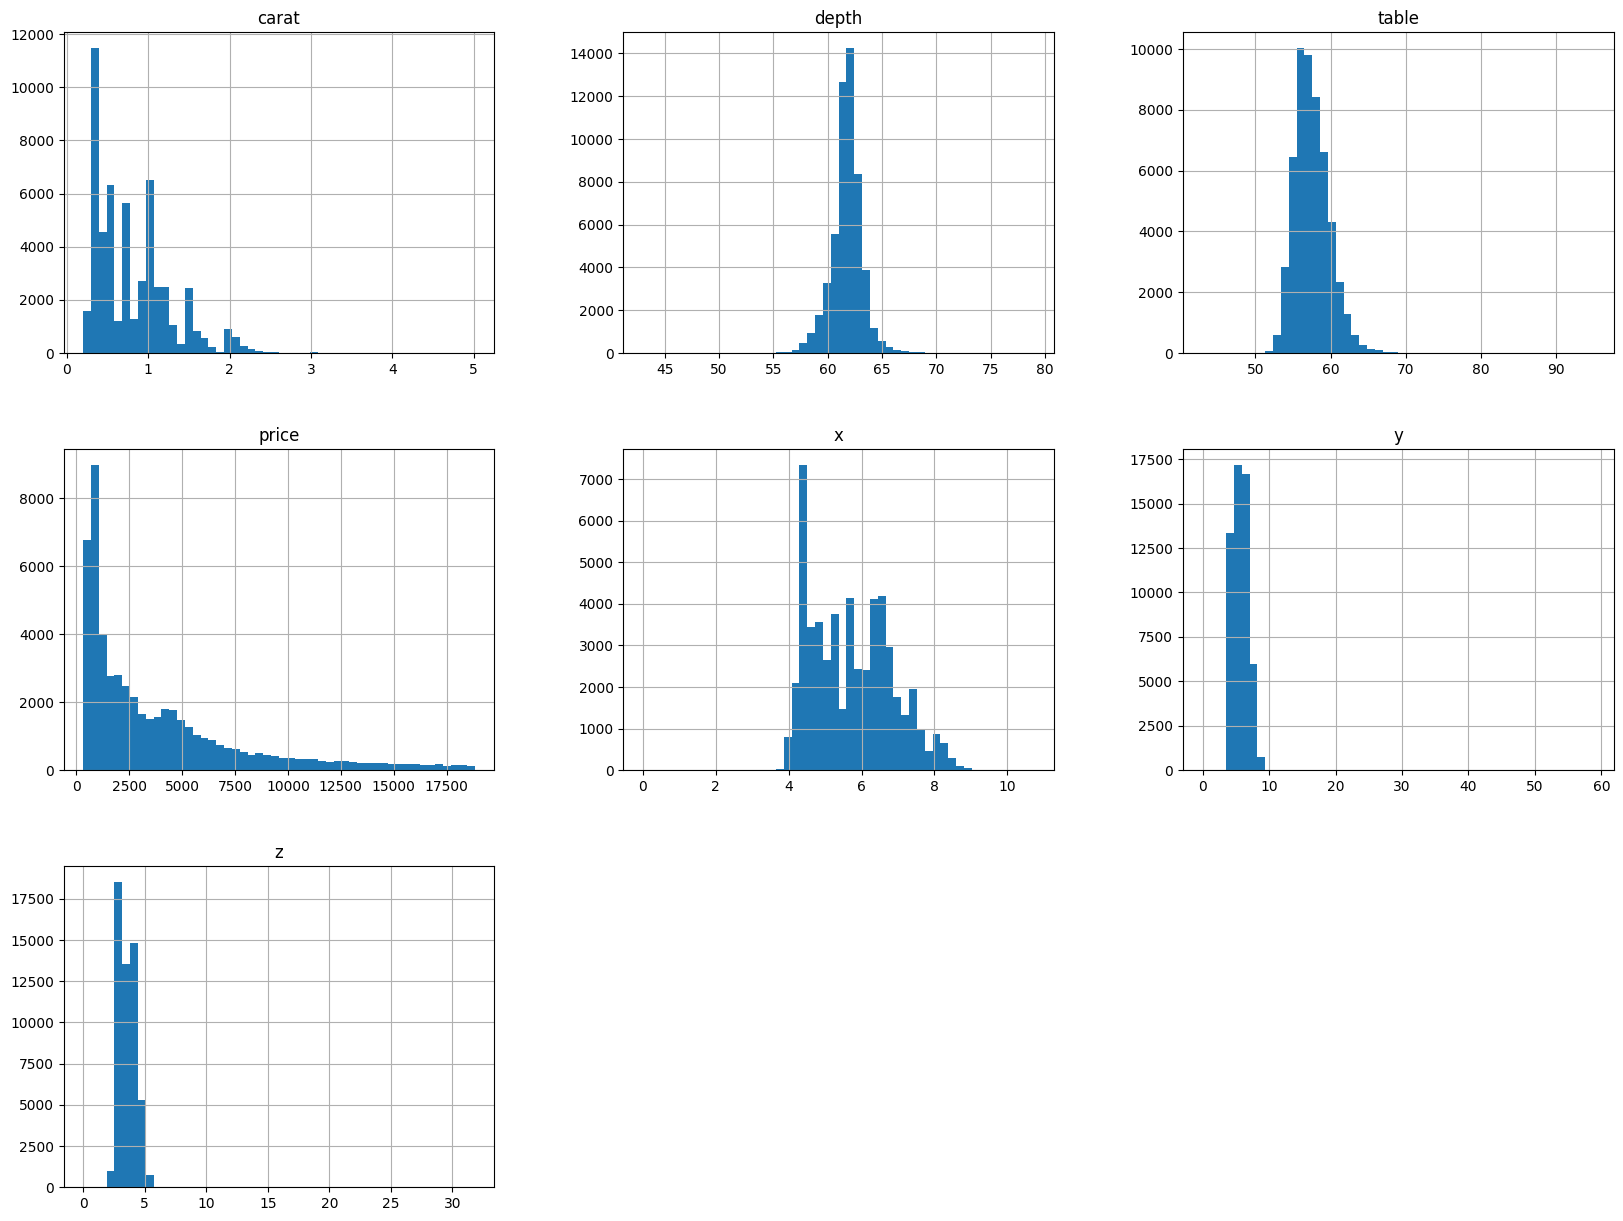

In [13]:
diamonds.hist(bins=50, figsize=(20, 15))
plt.show()

#### Create a Test Set

In [14]:
diamonds["carat_cat"] = pd.cut(diamonds["carat"], bins=[0., 1., 2., 3., 4., np.inf], labels=[1, 2, 3, 4, 5])
diamonds["carat_cat"].value_counts()

carat_cat
1    36438
2    15613
3     1857
4       27
5        5
Name: count, dtype: int64

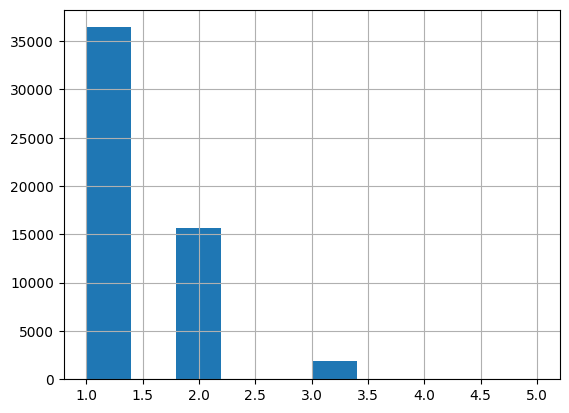

In [15]:
diamonds["carat_cat"].hist();

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(split.split(diamonds, diamonds["carat_cat"]))
strat_train_set = diamonds.loc[train_index]
strat_test_set = diamonds.loc[test_index]
strat_test_set["carat_cat"].value_counts() / len(strat_test_set)

carat_cat
1    0.675565
2    0.289488
3    0.034390
4    0.000463
5    0.000093
Name: count, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("carat_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [18]:
diamonds = strat_train_set.copy()

#### Looking for Correlations

In [19]:
corr_matrix = diamonds.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921097
x        0.883972
y        0.859818
z        0.857093
table    0.129666
depth   -0.013416
Name: price, dtype: float64

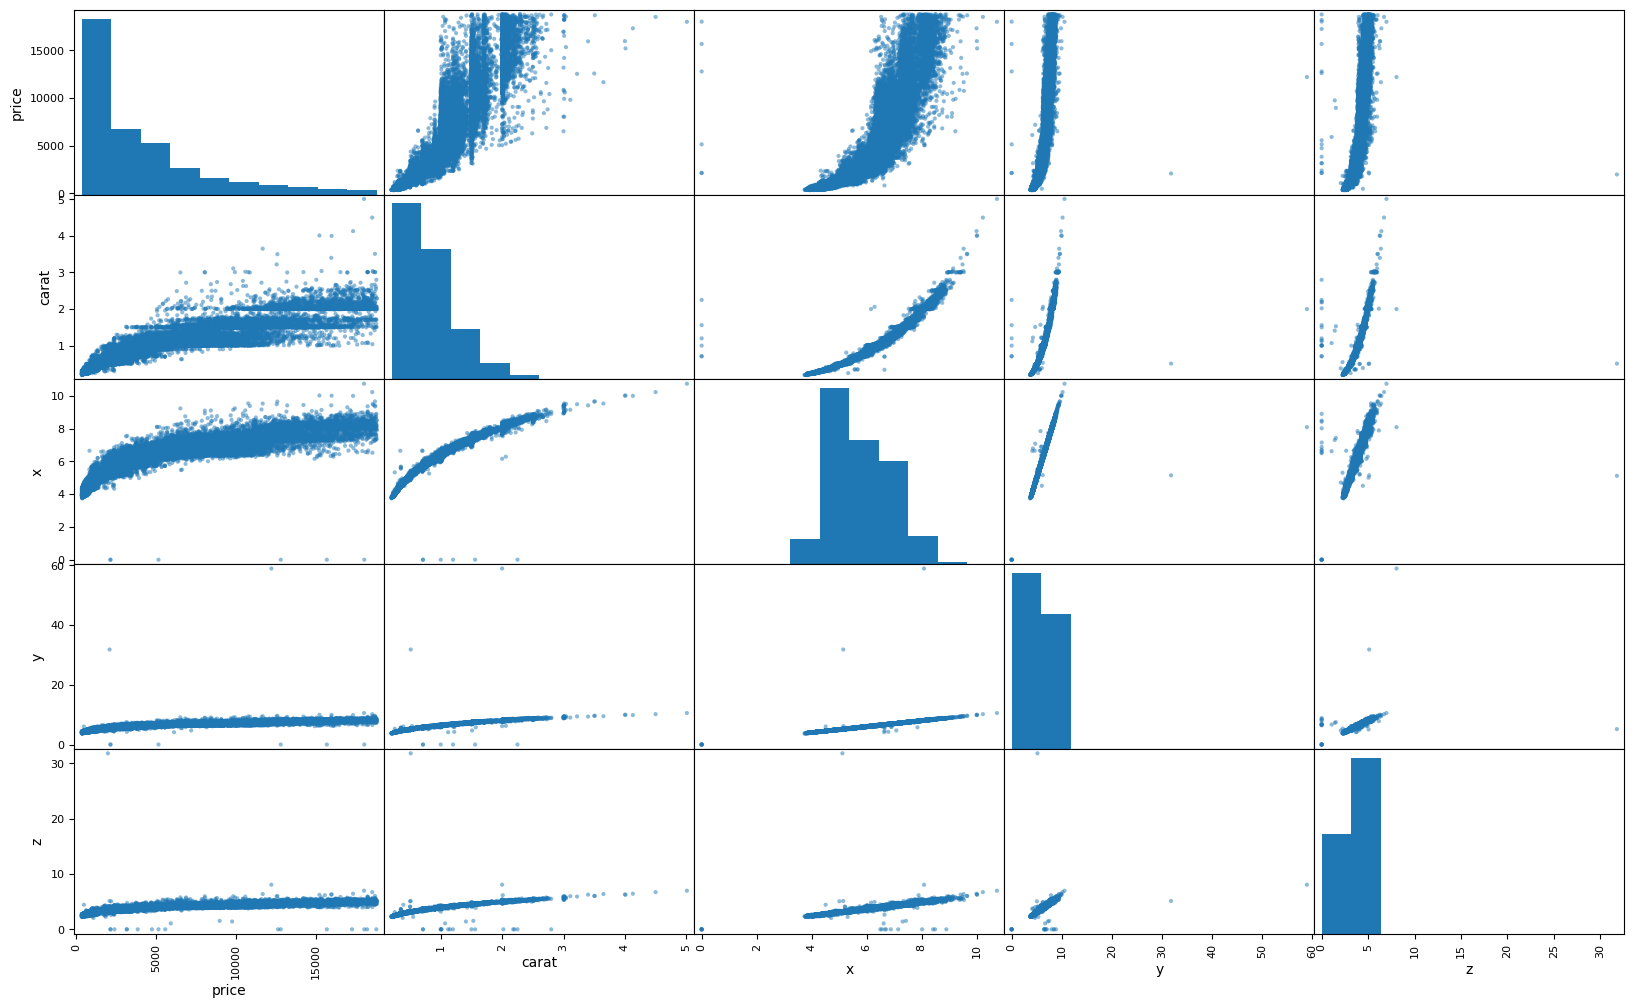

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["price", "carat", "x", "y", "z"]
scatter_matrix(diamonds[attributes], figsize=(20, 12));

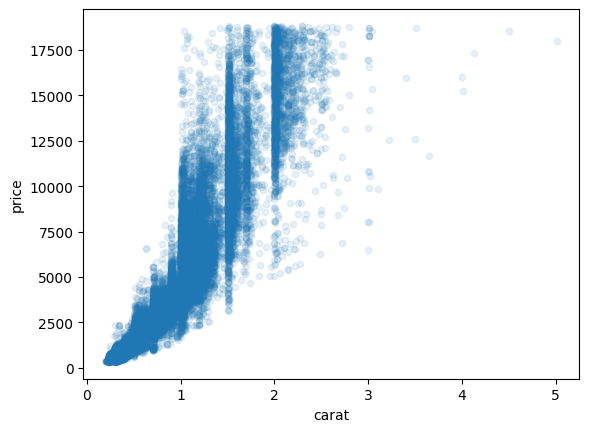

In [21]:
diamonds.plot(kind="scatter", x="carat", y="price", alpha=0.1);

#### Experimenting with Attribute Combinations

In [22]:
comb_attributes = ["carat", "depth", "table", "x", "y", "z"]
combinations_n = 3

attributes_combinations = []
for i in range(len(comb_attributes)):
    atr1 = comb_attributes[i]    
    for j in range(i + 1, len(comb_attributes)):
        atr2 = comb_attributes[j]
        attributes_combinations.append(f"{atr1}_per_{atr2}")
        diamonds[attributes_combinations[-1]] = diamonds[atr1] / diamonds[atr2]
        
corr_price = diamonds.corr(numeric_only=True)["price"].sort_values(ascending=False)
corr_price_combinations = corr_price[corr_price.index.isin(attributes_combinations)]
for atr in corr_price_combinations.iloc[combinations_n:].index:
    diamonds.drop(atr, axis=1, inplace=True)

In [23]:
corr_matrix = diamonds.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
carat_per_depth    0.922335
carat_per_table    0.921339
carat              0.921097
carat_per_x        0.906206
x                  0.883972
y                  0.859818
z                  0.857093
table              0.129666
depth             -0.013416
Name: price, dtype: float64

## Prepare the Data for Machine Learning Algorithms

In [24]:
diamonds = strat_train_set.drop("price", axis=1)
diamonds_labels = strat_train_set["price"].copy()

#### Data Cleaning

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis=1)
imputer.fit(diamonds_num)
imputer.statistics_

array([ 0.7 , 61.8 , 57.  ,  5.7 ,  5.71,  3.53])

In [26]:
diamonds_num.median().values

array([ 0.7 , 61.8 , 57.  ,  5.7 ,  5.71,  3.53])

In [27]:
X = imputer.transform(diamonds_num)
diamonds_tr = pd.DataFrame(X, columns=diamonds_num.columns, index=diamonds_num.index)

#### Handling Text and Categorical Attributes

In [28]:
diamonds_cat = diamonds[["cut", "color", "clarity"]]
diamonds_cat.head(10)

,cut,color,clarity
34261,Ideal,H,SI1
9928,Premium,H,SI1
4163,Very Good,F,VVS2
53045,Very Good,E,SI1
27701,Ideal,G,IF
53454,Ideal,F,VS2
41802,Very Good,F,SI1
29979,Very Good,F,VS2
47992,Very Good,F,SI1
38256,Very Good,G,SI1


In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
diamonds_cat_1hot = cat_encoder.fit_transform(diamonds_cat)
diamonds_cat_1hot

<43152x20 sparse matrix of type '<class 'numpy.float64'>'
	with 129456 stored elements in Compressed Sparse Row format>

In [30]:
diamonds_cat_1hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [31]:
cat_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

#### Custom Transformers

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, combinations_n): # no *args or **kwargs
        self.combinations_n = combinations_n
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        combined_attributes = X.copy()
        for atr in corr_price_combinations.iloc[:self.combinations_n].index:
            atr = str.split(atr, sep="_per_")
            atr1, atr2 = [diamonds_num.columns.get_loc(c) for c in atr]
            atr1, atr2 = X[:, atr1], X[:, atr2]
            combined_attribute = np.divide(atr1, atr2, out=np.full_like(atr1, np.nan), where=(atr2 != 0.0))
            combined_attributes = np.c_[combined_attributes, combined_attribute]
        return combined_attributes

attr_adder = CombinedAttributesAdder(combinations_n=combinations_n)
diamonds_extra_attribs = attr_adder.transform(diamonds_num.values)

#### Transformation Pipelines (with Feature Scaling)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer_1", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder(combinations_n=3)),
    ("imputer_2", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
], verbose=True)

diamonds_num_tr = num_pipeline.fit_transform(diamonds_num)
diamonds_num_tr[0]

[Pipeline] ......... (step 1 of 4) Processing imputer_1, total=   0.0s
[Pipeline] ..... (step 2 of 4) Processing attribs_adder, total=   0.0s
[Pipeline] ......... (step 3 of 4) Processing imputer_2, total=   0.0s
[Pipeline] ........ (step 4 of 4) Processing std_scaler, total=   0.0s


array([-1.05012986,  0.24349099, -0.65510043, -1.27590458, -1.23060833,
       -1.22648943, -1.05355393, -1.04159579, -1.16200886])

In [34]:
from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_num)
cat_attribs = ["cut", "color", "clarity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(categories=cat_encoder.categories_), cat_attribs)
], verbose=True)

diamonds_prepared = full_pipeline.fit_transform(diamonds)
diamonds_prepared[0]

[Pipeline] ......... (step 1 of 4) Processing imputer_1, total=   0.0s
[Pipeline] ..... (step 2 of 4) Processing attribs_adder, total=   0.0s
[Pipeline] ......... (step 3 of 4) Processing imputer_2, total=   0.0s
[Pipeline] ........ (step 4 of 4) Processing std_scaler, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.1s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


array([-1.05012986,  0.24349099, -0.65510043, -1.27590458, -1.23060833,
       -1.22648943, -1.05355393, -1.04159579, -1.16200886,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [35]:
diamonds_prepared.shape

(43152, 29)

## Select and Train a Model

#### Training and Evaluating on the Training Set

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)

LinearRegression()

In [37]:
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [38]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [-769.97369609 5201.78803298 4575.02956161 2962.62192104 1037.51260116]


In [39]:
print("Labels:", list(some_labels))

Labels: [465, 4692, 3551, 2606, 648]


In [40]:
from sklearn.metrics import root_mean_squared_error

diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_rmse = root_mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse

1113.1666007660665

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(diamonds_prepared, diamonds_labels)

DecisionTreeRegressor(random_state=42)

In [42]:
diamonds_predictions = tree_reg.predict(diamonds_prepared)
tree_rmse = root_mean_squared_error(diamonds_labels, diamonds_predictions)
tree_rmse

9.30633787804227

#### Better Evaluation Using Cross-Validation

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels, cv=10, scoring="neg_root_mean_squared_error",
                         n_jobs=-1, pre_dispatch="2*n_jobs")
tree_rmse_scores = -scores

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [749.24268701 732.94245969 710.47348961 747.536946   740.86667093
 781.61293602 769.79870682 717.8237499  763.43500047 747.48463879]
Mean: 746.1217285223221
Standard deviation: 20.991561476141367


In [45]:
lin_scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels, cv=10, scoring="neg_root_mean_squared_error",
                             n_jobs=-1, pre_dispatch="2*n_jobs")
lin_rmse_scores = -lin_scores
display_scores(lin_rmse_scores)

Scores: [1091.05587216 1094.3060253  1117.68129249 1103.66321565 1156.29124586
 1133.36207789 1145.85829248 1127.03523855 1075.31679321 1120.48760517]
Mean: 1116.5057658769406
Standard deviation: 24.204721294148282


In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(diamonds_prepared, diamonds_labels)

RandomForestRegressor(random_state=42)

In [47]:
diamonds_predictions = forest_reg.predict(diamonds_prepared)
forest_rmse = root_mean_squared_error(diamonds_labels, diamonds_predictions)
forest_rmse

204.9376100081622

In [48]:
forest_scores = cross_val_score(forest_reg, diamonds_prepared, diamonds_labels, cv=10, scoring="neg_root_mean_squared_error",
                                n_jobs=-1, pre_dispatch="2*n_jobs")
forest_rmse_scores = -forest_scores
display_scores(forest_rmse_scores)

Scores: [556.87468272 538.51227209 553.34620942 564.21966702 537.66641126
 544.86566222 578.44629899 535.40857769 539.73966026 549.42704352]
Mean: 549.8506485195767
Standard deviation: 13.032978791662858


## Fine-Tune Your Model

#### Grid Search

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True,
                           n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs")
grid_search.fit(diamonds_prepared, diamonds_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [50]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [51]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [52]:
grid_search_rmse = -grid_search.best_score_
grid_search_rmse

575.1648467960943

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

904.7884529201813 {'max_features': 2, 'n_estimators': 3}
751.5773785060582 {'max_features': 2, 'n_estimators': 10}
711.0824475247989 {'max_features': 2, 'n_estimators': 30}
772.6587766636752 {'max_features': 4, 'n_estimators': 3}
651.6853088067511 {'max_features': 4, 'n_estimators': 10}
627.0968729710025 {'max_features': 4, 'n_estimators': 30}
733.9055183471967 {'max_features': 6, 'n_estimators': 3}
626.0777385282869 {'max_features': 6, 'n_estimators': 10}
593.0563653662898 {'max_features': 6, 'n_estimators': 30}
691.9575159698081 {'max_features': 8, 'n_estimators': 3}
600.4454160813814 {'max_features': 8, 'n_estimators': 10}
575.1648467960943 {'max_features': 8, 'n_estimators': 30}
811.5343671958583 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
704.8287708695299 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
794.8907010892941 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
673.6253759723629 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

#### Analyze the Best Models and Their Errors

In [54]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.21969519, 0.00374839, 0.00261923, 0.06387725, 0.11703681,
       0.033642  , 0.25790971, 0.15185969, 0.05549445, 0.00039954,
       0.00028627, 0.00082159, 0.00040816, 0.00029595, 0.00326058,
       0.00254171, 0.00255478, 0.0027818 , 0.00407893, 0.00647573,
       0.00985684, 0.01112625, 0.00545292, 0.00772813, 0.01626728,
       0.00319817, 0.00374498, 0.00548757, 0.00735009])

In [55]:
extra_attribs = list(corr_price_combinations.iloc[:combinations_n].index)
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
feature_importance_tuples = sorted(zip(feature_importances, attributes), reverse=True)
feature_importance_tuples

[(0.2579097067628262, 'carat_per_depth'),
 (0.21969518886409145, 'carat'),
 (0.15185969060305562, 'carat_per_table'),
 (0.11703680609973009, 'y'),
 (0.06387725143284766, 'x'),
 (0.05549445376426607, 'carat_per_x'),
 (0.033641999014659675, 'z'),
 (0.0037483887599815188, 'depth'),
 (0.002619233373478273, 'table'),
 (0.0008215896682050209, 'Ideal'),
 (0.00040816269113993245, 'Premium'),
 (0.0003995438715343348, 'Fair'),
 (0.00029595421227222743, 'Very Good'),
 (0.00028627357257111175, 'Good')]

#### Evaluate Your System on the Test Set

In [56]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

563.1306072307506

In [57]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([538.40101529, 586.81897407])

## Exercises

#### 1.
Try a Support Vector Machine regressor (```sklearn.svm.SVR```) with various hyperparameters, such as ```kernel="linear"``` (with various values for the ```C``` hyperparameter) or ```kernel="rbf"``` (with various values for the ```C``` and ```gamma``` hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best ```SVR``` predictor perform?

In [58]:
from sklearn.svm import SVR

param_grid = [
    {"kernel": ["linear"], "C": [128, 256, 512, 1024]},
    {"kernel": ["rbf"], "C": [128, 256, 512, 1024], "gamma": [0.1, 0.5, 1, 2]}
]

svr_reg = SVR()
grid_search_svr = GridSearchCV(svr_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True, 
                               n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs")
grid_search_svr.fit(diamonds_prepared, diamonds_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [128, 256, 512, 1024], 'kernel': ['linear']},
                         {'C': [128, 256, 512, 1024], 'gamma': [0.1, 0.5, 1, 2],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [59]:
grid_search_svr.best_params_

{'C': 1024, 'gamma': 0.1, 'kernel': 'rbf'}

In [60]:
grid_search_svr.best_estimator_

SVR(C=1024, gamma=0.1)

In [61]:
grid_search_svr_rmse = -grid_search_svr.best_score_
grid_search_svr_rmse

649.220792600871

#### 2.
Try replacing ```GridSearchCV``` with ```RandomizedSearchCV```.

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_rand = {
    "kernel": ["linear", "rbf"],
    "C": uniform(0, 1000),
    "gamma": uniform(0, 10)
}

svr_reg = SVR()
n_iter = 20
rand_search = RandomizedSearchCV(svr_reg, param_rand, cv=5, scoring="neg_root_mean_squared_error", return_train_score=True, 
                                 n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs", n_iter=n_iter, random_state=42)
rand_search.fit(diamonds_prepared, diamonds_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023236172F10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023236186220>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=2)

In [63]:
rand_search.best_params_

{'C': 938.5527090157501, 'gamma': 0.007787658410143283, 'kernel': 'rbf'}

In [64]:
rand_search.best_estimator_

SVR(C=938.5527090157501, gamma=0.007787658410143283)

In [65]:
rand_search_rmse = -rand_search.best_score_
rand_search_rmse

894.9416651725918

#### 3. 
Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [66]:
class AttributesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribs_n):
        self.attribs_n = attribs_n
        self.feature_importances = None
        self.attribs_list = None
    def fit(self, X, y=None):
        self.feature_importances = feature_importances # ... calculate feature_importances based on X here
        self.attribs_list = sorted(np.argsort(self.feature_importances)[-self.attribs_n:])
        return self
    def transform(self, X, y=None):
        return X[:, self.attribs_list]

In [67]:
attribs_n = 5
full_select_pipeline = Pipeline([
    ("full", full_pipeline),
    ("select", AttributesSelector(attribs_n))
], verbose=True)

diamonds_selector_prepared = full_select_pipeline.fit_transform(diamonds)
diamonds_selector_prepared[0]

[Pipeline] ......... (step 1 of 4) Processing imputer_1, total=   0.0s
[Pipeline] ..... (step 2 of 4) Processing attribs_adder, total=   0.0s
[Pipeline] ......... (step 3 of 4) Processing imputer_2, total=   0.0s
[Pipeline] ........ (step 4 of 4) Processing std_scaler, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.1s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] .............. (step 1 of 2) Processing full, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing select, total=   0.0s


array([-1.05012986, -1.27590458, -1.23060833, -1.05355393, -1.04159579])

In [68]:
[feature for feature in feature_importance_tuples[:attribs_n]]

[(0.2579097067628262, 'carat_per_depth'),
 (0.21969518886409145, 'carat'),
 (0.15185969060305562, 'carat_per_table'),
 (0.11703680609973009, 'y'),
 (0.06387725143284766, 'x')]

In [69]:
important_features_indices = sorted(np.argsort(feature_importances)[-attribs_n:])
important_features_indices

[0, 3, 4, 6, 7]

In [70]:
np.all(diamonds_selector_prepared == diamonds_prepared[:, important_features_indices])

True

#### 4. 
Try creating a single pipeline that does the full data preparation plus the final prediction.

In [71]:
full_select_predict_pipeline = Pipeline([
    ("full_select", full_select_pipeline),
    ("predict", final_model)
], verbose=True)

full_select_predict_pipeline.fit(diamonds, diamonds_labels)

[Pipeline] ......... (step 1 of 4) Processing imputer_1, total=   0.0s
[Pipeline] ..... (step 2 of 4) Processing attribs_adder, total=   0.0s
[Pipeline] ......... (step 3 of 4) Processing imputer_2, total=   0.0s
[Pipeline] ........ (step 4 of 4) Processing std_scaler, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] .............. (step 1 of 2) Processing full, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing select, total=   0.0s
[Pipeline] ....... (step 1 of 2) Processing full_select, total=   0.1s
[Pipeline] ........... (step 2 of 2) Processing predict, total=   2.7s


Pipeline(steps=[('full_select',
                 Pipeline(steps=[('full',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer_1',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributesAdder(combinations_n=3)),
                                                                                   ('imputer_2',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())],
                                                                            verbose=True),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),...
                                                                   OneHotEncoder(categories=[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
                                                                                             array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
                                                                                             array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])],
                                                    verbose=True)),
                                 ('select', AttributesSelector(attribs_n=5))],
                          verbose=True)),
                ('predict',
                 RandomForestRegressor(max_features=8, n_estimators=30,
                                       random_state=42))],
         verbose=True)

In [72]:
some_data = diamonds.iloc[:5]
some_labels = diamonds_labels.iloc[:5]

In [73]:
print("Predictions:", full_select_predict_pipeline.predict(some_data))

Predictions: [ 540.56666667 4738.03333333 3453.96666667 2615.23333333  602.5       ]


In [74]:
print("Labels:", list(some_labels))

Labels: [465, 4692, 3551, 2606, 648]


#### 5. 
Automatically explore some preparation options using GridSearchCV.

In [76]:
param_grid = [{
    "full_select__full__num__imputer_1__strategy": ["mean", "median", "most_frequent"],
    "full_select__select__attribs_n": list(range(1, len(attributes) + 1))
}]

grid_search_prep = GridSearchCV(full_select_predict_pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error", 
                                return_train_score=True, n_jobs=-1, verbose=2, pre_dispatch="2*n_jobs")
grid_search_prep.fit(diamonds, diamonds_labels)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[Pipeline] ......... (step 1 of 4) Processing imputer_1, total=   0.0s
[Pipeline] ..... (step 2 of 4) Processing attribs_adder, total=   0.0s
[Pipeline] ......... (step 3 of 4) Processing imputer_2, total=   0.0s
[Pipeline] ........ (step 4 of 4) Processing std_scaler, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] .............. (step 1 of 2) Processing full, total=   0.1s
[Pipeline] ............ (step 2 of 2) Processing select, total=   0.0s
[Pipeline] ....... (step 1 of 2) Processing full_select, total=   0.1s
[Pipeline] ........... (step 2 of 2) Processing predict, total=   2.6s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_select',
                                        Pipeline(steps=[('full',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer_1',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('attribs_adder',
                                                                                                           CombinedAttributesAdder(combinations_n=3)),
                                                                                                          ('imputer_2',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('std_scaler',
                                                                                                           StandardScaler())],
                                                                                                   verbose=True),
                                                                                          ['carat',
                                                                                           'd...
                                                 verbose=True)),
                                       ('predict',
                                        RandomForestRegressor(max_features=8,
                                                              n_estimators=30,
                                                              random_state=42))],
                                verbose=True),
             n_jobs=-1,
             param_grid=[{'full_select__full__num__imputer_1__strategy': ['mean',
                                                                          'median',
                                                                          'most_frequent'],
                          'full_select__select__attribs_n': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [77]:
grid_search_prep.best_params_

{'full_select__full__num__imputer_1__strategy': 'mean',
 'full_select__select__attribs_n': 14}

In [78]:
grid_search_prep.best_estimator_

Pipeline(steps=[('full_select',
                 Pipeline(steps=[('full',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer_1',
                                                                                    SimpleImputer()),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributesAdder(combinations_n=3)),
                                                                                   ('imputer_2',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())],
                                                                            verbose=True),
                                                                   ['carat',
                                                                    'depth',
                                                                    'table',
                                                                    'x', 'y',
                                                                    'z']),
                                                                  ('cat',
                                                                   OneHotEnco...m', 'Very Good'], dtype=object),
                                                                                             array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
                                                                                             array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]),
                                                                   ['cut',
                                                                    'color',
                                                                    'clarity'])],
                                                    verbose=True)),
                                 ('select', AttributesSelector(attribs_n=14))],
                          verbose=True)),
                ('predict',
                 RandomForestRegressor(max_features=8, n_estimators=30,
                                       random_state=42))],
         verbose=True)

In [79]:
grid_search_prep_rmse = -grid_search_prep.best_score_
grid_search_prep_rmse

812.0145360009997